<a href="https://colab.research.google.com/github/tphlabs/python_workshop/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

v.0.1.3

Linear Regression is a fundamental statistical technique used to model the relationship between a dependent variable and one or more independent variables
## 1. Introduction to Linear Regression

Linear Regression aims to find the best-fitting linear relationship between the dependent variable (often called the response or target) and the independent variable(s) (often called predictors or features). The simplest form is Simple Linear Regression, which involves one dependent and one independent variable. Multiple Linear Regression involves one dependent and multiple independent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## Example data

$$
x = (x_1, \dots , x_n),  \qquad y = (y_1, \dots , y_n)
$$


In [2]:
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 3, 5, 7, 11])  # Dependent variable



## Linear fit

$$
Y = a x + b,
$$

where

$a$ - slope, $b$ - intercept.



In [3]:
fit = linregress(x, y)
slope = fit.slope
intercept = fit.intercept
slope_err = fit.stderr
intercept_err = fit.intercept_stderr
print(f'Linear fit parameters:')
print(f'slope    : {slope:.1f} ± {slope_err:.1f}')
print(f'intercept: {intercept:.1f} ± {intercept_err:.1f}')



Linear fit parameters:
slope    : 2.2 ± 0.3
intercept: -1.0 ± 1.0


## Display on plot with prediction confindence interval

### Option 1: Simplified, not quite correct
Prediction
$$
Y = ax + b,
ִִִִִִ$$
Error
$$
\hat\sigma^2 \approx \frac{\sum{(y_i - Y)^2}}{n}
$$


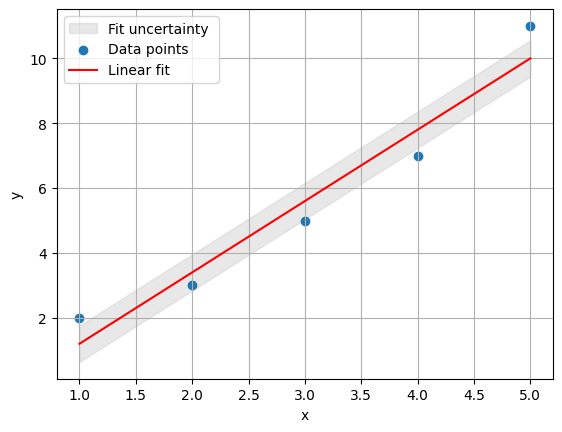

In [4]:
Y = x * slope + intercept
n = len(y)
sigma = np.sum((y - Y)**2) / n

y_top = Y + sigma
y_bot = Y - sigma
plt.fill_between(x, y_bot, y_top, color='lightgray', alpha=0.5, label=r'Fit uncertainty ')

plt.scatter(x, y, label='Data points')

plt.plot(x, slope * x + intercept, color='red', label='Linear fit')

plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')
plt.legend()

### Option 2: Simple visualization with ``seaborn`` module

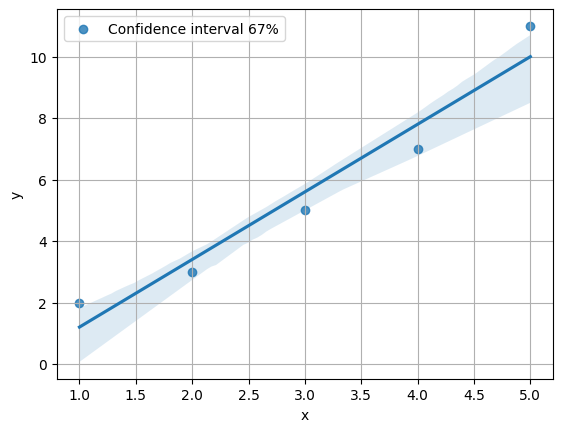

In [6]:
import seaborn as sns

sns.regplot(x=x, y=y, ci=67, label='Confidence interval 67%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('on')
plt.show()